In [1]:
import numpy as np
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
data = pd.read_csv('data_23thang10.csv')


In [43]:
X_before = data.values


In [44]:
X = X_before[:,3:6]
y = X_before[:,2]


In [45]:
dict = {}
count = 0
for nhaDauTu in X_before[:,6]:
    dict[nhaDauTu]= count
    count+=1

print(dict)


{' Công ty TNHH Một thành viên quản lý và phát triển nhà Hà Nội': 5, 'Bộ Tham Mưu - Bộ Tư Lệnh Bộ Đội Biên Phòng': 8, 'C.T Group': 12, 'Công TNHH Bắc Chương Dương': 18, 'Công ty Booyoung': 58, 'Công ty Cổ phần 118  – Momota': 71, 'Công ty Cổ phần Đầu tư Bất động sản An Bình': 73, 'Công ty Cổ phần Đầu tư Mai Linh': 87, 'Công ty Cổ phần Địa ốc MB': 100, 'Công ty Cổ phần Hợp tác Lao động Nước ngoài - LOD': 102, 'Công ty Cổ phần Licogi 12': 104, 'Công ty Cổ phần Lilama Hà Nội': 105, 'Công ty Cổ phần Tập đoàn FLC': 159, 'Công ty Cổ phần Tasco': 163, 'Công ty Cổ phần TASCO': 165, 'Công ty CP ACC - Thăng Long': 167, 'Công ty CP Bất động sản Dầu khí - Petrowaco': 170, 'Công ty CP Bất động sản Hải Phát': 230, 'Công ty CP Bất động sản Hanovid': 263, 'Công ty CP BIC Việt Nam': 268, 'Công ty CP Đại Việt Trí Tuệ': 295, 'Công ty CP Đầu tư - Thiết kế và Xây dựng Việt Nam': 342, 'Công ty CP Đầu tư – Xây dựng Tây Hà': 344, 'Công ty CP Đầu tư An Lạc': 349, 'Công ty CP Đầu tư Bất động sản Đông Đô - BQP':

In [46]:
# Đổi các nha dau tu thanh so 
for i in range(len(X_before[:,6])):
    for kiemTra in dict.keys():
        if kiemTra == X_before[i,6]:
            X_before[i,6] = dict[kiemTra]
print(X_before[:,6])

[5 5 5 ... 8040 8040 8040]


In [47]:
x_extend = X_before[:,6]
x_extend

array([5, 5, 5, ..., 8040, 8040, 8040], dtype=object)

In [48]:
print(np.nan_to_num(x_extend))



[5 5 5 ... 8040 8040 8040]


In [49]:
X = np.column_stack((X, x_extend))
        

In [50]:
X = np.nan_to_num(X)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [52]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
y_train = y_train.astype(np.float)
y_test = y_test.astype(np.float)

In [53]:
knn = KNeighborsRegressor(n_neighbors=3 )

In [54]:
# Train the model
knn.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=3)

In [56]:
# Test model's performance using Median Relative Absolute Error
y_pred = knn.predict(X_test)
accuracy = np.median(np.abs(y_pred - y_test) / y_test)


print('%0.2f'%( 1 - accuracy))
print(' giá đoán - giá thật ')
for i in range(len(y_pred)):
    print('%0.2f - %.2f'% ( y_pred[i] /1000000 ,y_test[i]/1000000))
    

0.92
 giá đoán - giá thật 
2371.67 - 2700.00
2192.67 - 2600.00
1946.67 - 1850.00
2483.33 - 3000.00
2953.33 - 2860.00
6200.00 - 5950.00
1916.67 - 1875.00
2983.33 - 2250.00
5083.33 - 2180.00
3500.00 - 3500.00
2983.33 - 2300.00
2776.67 - 2900.00
1643.33 - 1570.00
1893.33 - 1870.00
3666.67 - 3400.00
2850.00 - 2900.00
2560.00 - 2800.00
4493.33 - 4500.00
2000.00 - 2350.00
1682.00 - 1527.00
4628.67 - 4500.00
2236.67 - 1690.00
2683.33 - 3000.00
2023.33 - 1920.00
2483.33 - 2600.00
2483.33 - 2300.00
1118.33 - 950.00
3266.67 - 3800.00
1486.67 - 1900.00
1093.33 - 960.00
4776.67 - 4600.00
1056.67 - 1020.00
2850.00 - 2800.00
1750.00 - 1850.00
965.67 - 965.00
2350.00 - 2200.00
4550.00 - 4500.00
1433.33 - 1450.00
3500.00 - 3750.00
2310.00 - 1750.00
3850.00 - 3800.00
2900.00 - 3200.00
1226.67 - 1260.00
3800.00 - 4000.00
1610.00 - 1300.00
1203.33 - 1180.00
640.00 - 1450.00
566.67 - 1250.00
2210.67 - 2000.00
2500.00 - 2600.00
2733.33 - 1850.00
2900.00 - 3000.00
4796.67 - 4800.00
2150.00 - 4200.00
3016.67

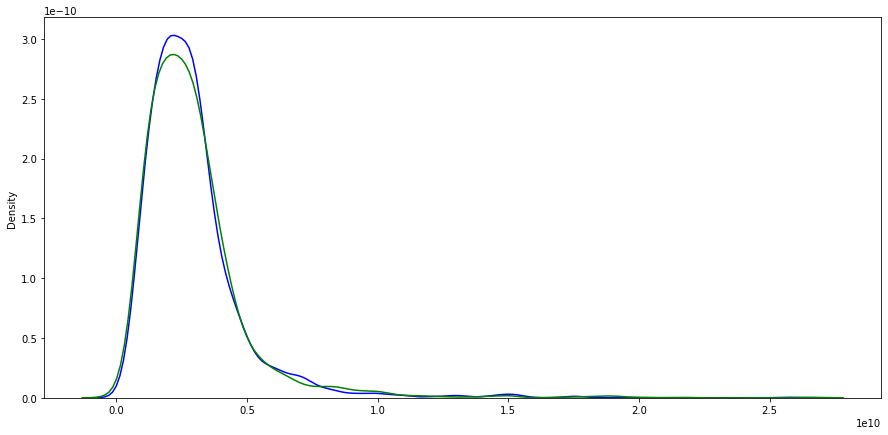

In [57]:
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.distplot(y_pred, kde=True, hist = False, color= 'blue')
sns.distplot(y_test,kde=True, hist = False, color= 'green')
plt.show()